In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:

import os
for dirname, _, filenames in os.walk('C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\brain tumor detection.ipynb
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\.ipynb_checkpoints\brain tumor detection-checkpoint.ipynb
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(1).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(10).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(100).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(11).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(12).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(13).jpg
C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor\Testing\glioma_tumor\image(14).jpg
C:/Users/HP/Downloads/datascience/deep learning 

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [19]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
from keras.layers import Dropout

In [20]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

       
for i in labels:
    folderPath = os.path.join(r'C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [21]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [23]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.2961 - loss: 3.9610 - val_accuracy: 0.2891 - val_loss: 1.3672
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.3573 - loss: 1.3175 - val_accuracy: 0.4524 - val_loss: 1.2058
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.5569 - loss: 1.0242 - val_accuracy: 0.5272 - val_loss: 1.0715
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6203 - loss: 0.8620 - val_accuracy: 0.6122 - val_loss: 0.8739
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6888 - loss: 0.7351 - val_accuracy: 0.6599 - val_loss: 0.8192
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.7165 - loss: 0.6494 - val_accuracy: 0.6939 - val_loss: 0.7071
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.7621 - loss: 0.5967 - val_accuracy: 0.7075 - val_loss: 0.6515
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.7782 - loss: 0.5376 - val_accuracy: 0.7687 - v

In [27]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.8913 - loss: 0.3935


[0.32330358028411865, 0.9021406769752502]

In [28]:
img = cv2.imread(r"C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor/Testing/pituitary_tumor/image(6).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

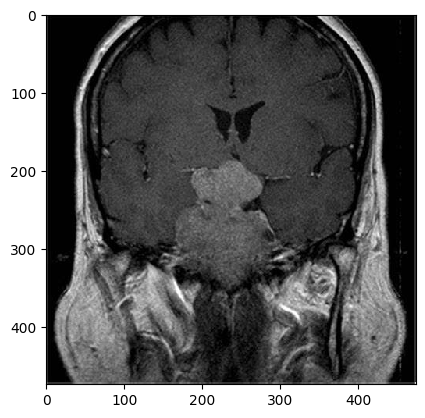

In [31]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:/Users/HP/Downloads/datascience/deep learning tutorial/brain-tumor/Testing/pituitary_tumor/image(6).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


3